In [1]:
import pandas as pd

data_directory = 'object-detection-crowdai'

label_file = pd.read_csv(data_directory + '/labels.csv')
print('Dataset has', len(label_file), 'labels in total.')

# fix incorrect labelling in the dataset
label_file['ymin_temp'] = label_file['xmax']
label_file['xmax'] = label_file['ymin']
label_file['ymin'] = label_file['ymin_temp']
label_file = label_file.drop('ymin_temp', 1)

# filter only cars and trucks as vehicles
label_file = label_file[(label_file['Label'] == 'Car') | (label_file['Label'] == 'Truck')]
label_file = label_file.drop('Preview URL', 1)
label_file = label_file.reset_index().drop('index', 1)
print('Dataset has', len(label_file), 'car/truck vehicle labels.')

label_file['path'] =  data_directory + '/' + label_file['Frame']
label_file = label_file.drop('Frame', 1)

Dataset has 72064 labels in total.
Dataset has 66389 car/truck vehicle labels.


In [2]:
label_file.head()

,xmin,xmax,ymin,ymax,Label,path
0,785,905,533,644,Car,object-detection-crowdai/1479498371963069978.jpg
1,89,291,551,680,Car,object-detection-crowdai/1479498371963069978.jpg
2,268,383,546,650,Car,object-detection-crowdai/1479498371963069978.jpg
3,455,548,522,615,Truck,object-detection-crowdai/1479498371963069978.jpg
4,548,625,522,605,Truck,object-detection-crowdai/1479498371963069978.jpg


In [3]:
label_file.tail()

,xmin,xmax,ymin,ymax,Label,path
66384,958,1045,559,621,Car,object-detection-crowdai/1479506176491553178.jpg
66385,1038,1122,558,630,Car,object-detection-crowdai/1479506176491553178.jpg
66386,667,747,558,626,Car,object-detection-crowdai/1479506176491553178.jpg
66387,730,818,568,613,Car,object-detection-crowdai/1479506176491553178.jpg
66388,435,532,551,589,Car,object-detection-crowdai/1479506176491553178.jpg


object-detection-crowdai/1479498371963069978.jpg


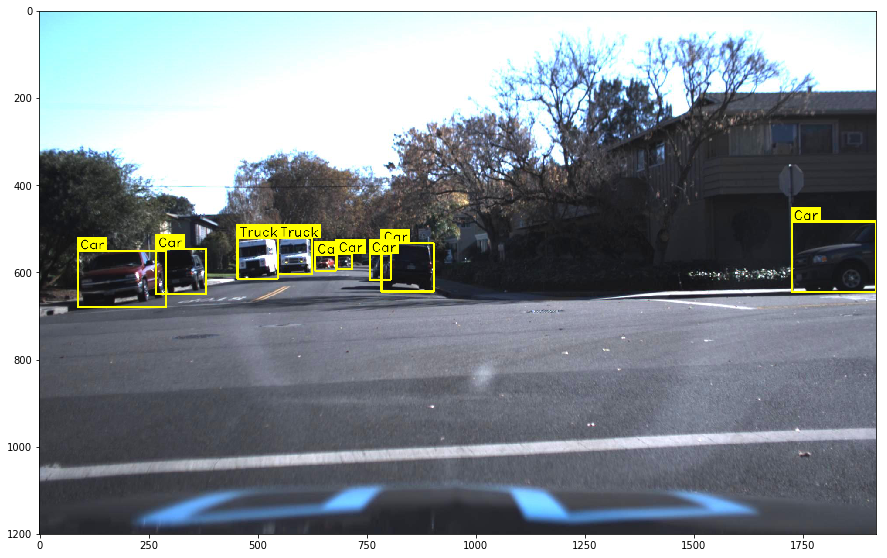

In [4]:
import cv2
import matplotlib.pyplot as plt
% matplotlib inline

i=0
while i <= 5:#len(label_file['path']):
    file_name = label_file['path'][i]
    print(file_name)
    img = plt.imread(file_name)

    while label_file['path'][i] == file_name:
        xmin = label_file['xmin'][i]
        xmax = label_file['xmax'][i]
        ymin = label_file['ymin'][i]
        ymax = label_file['ymax'][i]
        
        text = label_file['Label'][i]
        fontFace = cv2.FONT_HERSHEY_DUPLEX
        fontScale = 1
        thickness = 1
        line_thickness = 4
        size, baseline = cv2.getTextSize(text, fontFace, fontScale, thickness)
        cv2.rectangle(img, (xmin-int(line_thickness/2), ymin-size[1]-10), (xmin+size[0]+10, ymin), (255, 255, 0), -1)
        cv2.putText(img, text, (xmin+5, ymin-4), fontFace, fontScale, (0, 0, 0), thickness, cv2.LINE_AA)
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 255, 0), 4)
        i += 1

    plt.figure(figsize=(15,15))
    plt.imshow(img)
    plt.show()



In [13]:
from PIL import Image
import numpy, cv2
from tqdm import tqdm

# Load up the first and second demo images, assumed is that image1 and image2 both share the same height and width
image1 = Image.open('object-detection-crowdai/1479498371963069978.jpg')
image2 = Image.open('object-detection-crowdai/1479498375942206592.jpg')

# Grab the stats from image1 to use for the resultant video
height, width, layers =  numpy.array(image1).shape

# Create the OpenCV VideoWriter
video = cv2.VideoWriter('demo.avi', cv2.VideoWriter_fourcc(*"MJPG"), 10, (width, height))

current_file = None
current_image = None
num_labels = 1000#len(label_file['path'])
for i in tqdm(range(num_labels)):
    file_name = label_file['path'][i]
    if file_name != current_file:
        # write previous frame
        if current_image is not None:
            video.write(cv2.cvtColor(numpy.array(current_image), cv2.COLOR_RGB2BGR))
        
        # read new image
        current_image = plt.imread(file_name)
        current_file = file_name
        
    # pull out label data
    xmin = label_file['xmin'][i]
    xmax = label_file['xmax'][i]
    ymin = label_file['ymin'][i]
    ymax = label_file['ymax'][i]
    text = label_file['Label'][i]
    
    # setup bounding box settings
    text = label_file['Label'][i]
    fontFace = cv2.FONT_HERSHEY_DUPLEX
    fontScale = 1
    thickness = 1
    line_thickness = 4
    size, baseline = cv2.getTextSize(text, fontFace, fontScale, thickness)
    cv2.rectangle(current_image, (xmin-int(line_thickness/2), ymin-size[1]-10), (xmin+size[0]+10, ymin), (255, 255, 0), -1)
    cv2.putText(current_image, text, (xmin+5, ymin-4), fontFace, fontScale, (0, 0, 0), thickness, cv2.LINE_AA)
    cv2.rectangle(current_image, (xmin, ymin), (xmax, ymax), (255, 255, 0), 4)
    
video.release()
print("Done.")

100%|██████████| 1000/1000 [00:06<00:00, 155.90it/s]

Done.
